**Market Basket Analysis (MBA): Filter item sets**

mlxtend apriori: http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/



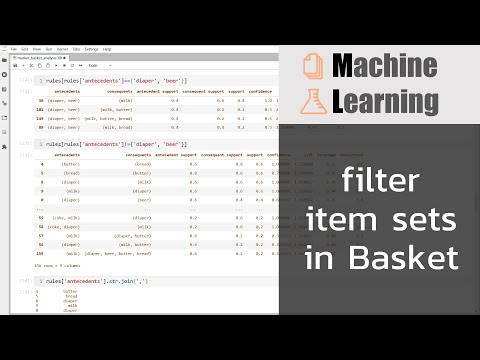

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('wpihOMpuCFQ', width=720, height=405)

In [2]:
import pandas as pd

import mlxtend
from mlxtend.frequent_patterns import association_rules, apriori

%config InlineBackend.figure_format='retina'

In [3]:
print(f'pandas    version: {pd.__version__}')
print(f'mlxtend   version: {mlxtend.__version__}')

pandas    version: 1.1.5
mlxtend   version: 0.14.0


In [4]:
pd.Timestamp.now()

Timestamp('2021-05-11 05:07:37.894430')

## **read data**

In [5]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/basket_items.csv'
data=pd.read_csv(url)
data[:5]

,trans,items
0,1,butter|bread|coke
1,2,bread|butter
2,3,beer|diaper|milk
3,4,beer|bread|butter|diaper|milk
4,5,coke|diaper|milk|bread


In [6]:

basket=data['items'].str.get_dummies('|').astype(pd.SparseDtype("bool"))
basket[:5]

,beer,bread,butter,coke,diaper,milk
0,False,True,True,True,False,False
1,False,True,True,False,False,False
2,True,False,False,False,True,True
3,True,True,True,False,True,True
4,False,True,False,True,True,True



## find frequent item sets **bold text**

In [7]:
frequent_itemsets = apriori(basket, min_support = 0.1, use_colnames = True)

# frequent_itemsets['support_n']=frequent_itemsets['support']*len(basket)
frequent_itemsets.sort_values('support', ascending=False)

,support,itemsets
1,0.8,(bread)
2,0.6,(butter)
4,0.6,(diaper)
5,0.6,(milk)
19,0.6,"(milk, diaper)"
10,0.6,"(butter, bread)"
0,0.4,(beer)
11,0.4,"(coke, bread)"
25,0.4,"(milk, diaper, beer)"
31,0.4,"(diaper, milk, bread)"


# rules and metrices


In [8]:
# metrices = ['support', 'confidence', 'lift', 'leverage', and 'conviction']

metric='lift'
# rules = association_rules(frequent_itemsets, metric = "support", min_threshold = .2)
# rules = association_rules(frequent_itemsets, metric = "confidence", min_threshold = .5)
rules = association_rules(frequent_itemsets, metric = metric, min_threshold = 1)

rules.sort_values('support', ascending = False, inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(butter),(bread),0.6,0.8,0.6,1.000000,1.250000,0.12,inf
5,(bread),(butter),0.8,0.6,0.6,0.750000,1.250000,0.12,1.600000
8,(milk),(diaper),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(diaper),(milk),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
0,(diaper),(beer),0.6,0.4,0.4,0.666667,1.666667,0.16,1.800000
...,...,...,...,...,...,...,...,...,...
59,"(milk, coke)",(diaper),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
58,"(coke, diaper)",(milk),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
57,(diaper),"(milk, butter)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.200000
56,(milk),"(butter, diaper)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.200000


## **filter item sets (SET column)**

In [9]:
rules.loc[4, 'antecedents']

frozenset({'butter'})

In [10]:
rules[rules['antecedents']=={'diaper'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,(diaper),(milk),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
0,(diaper),(beer),0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
34,(diaper),"(milk, beer)",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
52,(diaper),"(milk, bread)",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
117,(diaper),"(milk, butter, bread)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
108,(diaper),"(milk, butter, beer)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
95,(diaper),"(milk, bread, beer)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
157,(diaper),"(milk, butter, bread, beer)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
128,(diaper),"(milk, coke, bread)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
16,(diaper),"(bread, beer)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2


In [11]:
rules[rules['antecedents']!={'diaper'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(butter),(bread),0.6,0.8,0.6,1.000000,1.250000,0.12,inf
5,(bread),(butter),0.8,0.6,0.6,0.750000,1.250000,0.12,1.600000
8,(milk),(diaper),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
1,(beer),(diaper),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
51,"(milk, bread)",(diaper),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
...,...,...,...,...,...,...,...,...,...
61,(milk),"(coke, diaper)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.200000
59,"(milk, coke)",(diaper),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
58,"(coke, diaper)",(milk),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
56,(milk),"(butter, diaper)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.200000


In [12]:
rules[~(rules['antecedents']=={'diaper'})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(butter),(bread),0.6,0.8,0.6,1.000000,1.250000,0.12,inf
5,(bread),(butter),0.8,0.6,0.6,0.750000,1.250000,0.12,1.600000
8,(milk),(diaper),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
1,(beer),(diaper),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
51,"(milk, bread)",(diaper),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
...,...,...,...,...,...,...,...,...,...
61,(milk),"(coke, diaper)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.200000
59,"(milk, coke)",(diaper),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
58,"(coke, diaper)",(milk),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
56,(milk),"(butter, diaper)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.200000


In [13]:
rules[rules['antecedents']=={'diaper', 'beer'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32,"(diaper, beer)",(milk),0.4,0.6,0.4,1.0,1.666667,0.16,inf
106,"(diaper, beer)","(milk, butter)",0.4,0.2,0.2,0.5,2.500000,0.12,1.6
152,"(diaper, beer)","(milk, butter, bread)",0.4,0.2,0.2,0.5,2.500000,0.12,1.6
91,"(diaper, beer)","(milk, bread)",0.4,0.4,0.2,0.5,1.250000,0.04,1.2


In [14]:
rules[rules['antecedents']!={'diaper', 'beer'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(butter),(bread),0.6,0.8,0.6,1.000000,1.250000,0.12,inf
5,(bread),(butter),0.8,0.6,0.6,0.750000,1.250000,0.12,1.600000
8,(milk),(diaper),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(diaper),(milk),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
0,(diaper),(beer),0.6,0.4,0.4,0.666667,1.666667,0.16,1.800000
...,...,...,...,...,...,...,...,...,...
59,"(milk, coke)",(diaper),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
58,"(coke, diaper)",(milk),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
57,(diaper),"(milk, butter)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.200000
56,(milk),"(butter, diaper)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.200000


In [16]:
rules['antecedents'].str.join(',')

4           butter
5            bread
8             milk
9           diaper
0           diaper
          ...     
59       milk,coke
58     coke,diaper
57          diaper
56            milk
159          bread
Name: antecedents, Length: 160, dtype: object

In [17]:
# contains at least (diaper AND beer) OR others
# rules[rules['antecedents'] == {'beer', 'diaper'}] # equal
rules[rules['antecedents'].str.join(',').str.contains('(?=.*beer)(?=.*diaper)')]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32,"(diaper, beer)",(milk),0.4,0.6,0.4,1.0,1.666667,0.16,inf
100,"(butter, diaper, beer)",(milk),0.2,0.6,0.2,1.0,1.666667,0.08,inf
106,"(diaper, beer)","(milk, butter)",0.4,0.2,0.2,0.5,2.500000,0.12,1.6
145,"(bread, diaper, beer)","(milk, butter)",0.2,0.2,0.2,1.0,5.000000,0.16,inf
152,"(diaper, beer)","(milk, butter, bread)",0.4,0.2,0.2,0.5,2.500000,0.12,1.6
142,"(butter, diaper, beer)","(milk, bread)",0.2,0.4,0.2,1.0,2.500000,0.12,inf
132,"(milk, butter, diaper, beer)",(bread),0.2,0.8,0.2,1.0,1.250000,0.04,inf
135,"(bread, milk, diaper, beer)",(butter),0.2,0.6,0.2,1.0,1.666667,0.08,inf
136,"(bread, butter, diaper, beer)",(milk),0.2,0.6,0.2,1.0,1.666667,0.08,inf
91,"(diaper, beer)","(milk, bread)",0.4,0.4,0.2,0.5,1.250000,0.04,1.2


In [18]:
# not contains at least (diaper AND beer) OR others
rules[~rules['antecedents'].str.join(',').str.contains('(?=.*beer)(?=.*diaper)')]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(butter),(bread),0.6,0.8,0.6,1.000000,1.250000,0.12,inf
5,(bread),(butter),0.8,0.6,0.6,0.750000,1.250000,0.12,1.600000
8,(milk),(diaper),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(diaper),(milk),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
0,(diaper),(beer),0.6,0.4,0.4,0.666667,1.666667,0.16,1.800000
...,...,...,...,...,...,...,...,...,...
59,"(milk, coke)",(diaper),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
58,"(coke, diaper)",(milk),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
57,(diaper),"(milk, butter)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.200000
56,(milk),"(butter, diaper)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.200000


In [19]:
# contains diaper OR beer
rules[rules['antecedents'].str.join(',').str.contains('diaper|beer')]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,(diaper),(milk),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
0,(diaper),(beer),0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
1,(beer),(diaper),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
50,"(diaper, bread)",(milk),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
35,(beer),"(milk, diaper)",0.4,0.6,0.4,1.000000,1.666667,0.16,inf
...,...,...,...,...,...,...,...,...,...
63,"(butter, diaper, beer)",(bread),0.2,0.8,0.2,1.000000,1.250000,0.04,inf
62,"(butter, diaper, bread)",(beer),0.2,0.4,0.2,1.000000,2.500000,0.12,inf
60,(diaper),"(milk, coke)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
58,"(coke, diaper)",(milk),0.2,0.6,0.2,1.000000,1.666667,0.08,inf


In [20]:
rules[rules['antecedents'].apply(lambda s: len(s))==1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(butter),(bread),0.6,0.8,0.6,1.000000,1.250000,0.12,inf
5,(bread),(butter),0.8,0.6,0.6,0.750000,1.250000,0.12,1.600000
8,(milk),(diaper),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(diaper),(milk),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
0,(diaper),(beer),0.6,0.4,0.4,0.666667,1.666667,0.16,1.800000
...,...,...,...,...,...,...,...,...,...
61,(milk),"(coke, diaper)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.200000
60,(diaper),"(milk, coke)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.200000
57,(diaper),"(milk, butter)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.200000
56,(milk),"(butter, diaper)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.200000


In [21]:
rules[rules['antecedents'].apply(lambda s: len(s))==3]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
112,"(milk, butter, bread)",(diaper),0.2,0.6,0.2,1.0,1.666667,0.08,inf
120,"(milk, coke, diaper)",(bread),0.2,0.8,0.2,1.0,1.250000,0.04,inf
121,"(milk, diaper, bread)",(coke),0.4,0.4,0.2,0.5,1.250000,0.04,1.2
122,"(coke, diaper, bread)",(milk),0.2,0.6,0.2,1.0,1.666667,0.08,inf
123,"(milk, coke, bread)",(diaper),0.2,0.6,0.2,1.0,1.666667,0.08,inf
111,"(butter, diaper, bread)",(milk),0.2,0.6,0.2,1.0,1.666667,0.08,inf
98,"(milk, butter, diaper)",(beer),0.2,0.4,0.2,1.0,2.500000,0.12,inf
99,"(milk, butter, beer)",(diaper),0.2,0.6,0.2,1.0,1.666667,0.08,inf
100,"(butter, diaper, beer)",(milk),0.2,0.6,0.2,1.0,1.666667,0.08,inf
110,"(milk, butter, diaper)",(bread),0.2,0.8,0.2,1.0,1.250000,0.04,inf


In [22]:
rules[(rules['antecedents'].apply(lambda s: len(s))==1) & (rules['lift'] > 2)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
109,(beer),"(milk, butter, diaper)",0.4,0.2,0.2,0.5,2.5,0.12,1.6
158,(beer),"(milk, butter, diaper, bread)",0.4,0.2,0.2,0.5,2.5,0.12,1.6
29,(beer),"(milk, butter)",0.4,0.2,0.2,0.5,2.5,0.12,1.6
25,(beer),"(butter, diaper)",0.4,0.2,0.2,0.5,2.5,0.12,1.6
73,(beer),"(butter, diaper, bread)",0.4,0.2,0.2,0.5,2.5,0.12,1.6
85,(beer),"(milk, butter, bread)",0.4,0.2,0.2,0.5,2.5,0.12,1.6
